In [ ]:
!pip install -q kagglehub

import kagglehub
import os

path = kagglehub.dataset_download("chethuhn/network-intrusion-dataset")

print("Archivos descargados en:", path)

files = os.listdir(path)
print("Contenido del dataset:")
for file in files:
    print("-", file)

import pandas as pd

csv_files = [f for f in files if f.endswith(".csv")]
if csv_files:
    df = pd.read_csv(os.path.join(path, csv_files[0]))
    print("\nPrimeras filas del archivo CSV:")
    display(df.head())
else:
    print("No se encontraron archivos CSV en el dataset.")


Archivos descargados en: /kaggle/input/network-intrusion-dataset
Contenido del dataset:
- Friday-WorkingHours-Afternoon-PortScan.pcap_ISCX.csv
- Thursday-WorkingHours-Morning-WebAttacks.pcap_ISCX.csv
- Tuesday-WorkingHours.pcap_ISCX.csv
- Friday-WorkingHours-Afternoon-DDos.pcap_ISCX.csv
- Monday-WorkingHours.pcap_ISCX.csv
- Friday-WorkingHours-Morning.pcap_ISCX.csv
- Thursday-WorkingHours-Afternoon-Infilteration.pcap_ISCX.csv
- Wednesday-workingHours.pcap_ISCX.csv

Primeras filas del archivo CSV:


,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,22,1266342,41,44,2664,6954,456,0,64.975610,109.864573,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
1,22,1319353,41,44,2664,6954,456,0,64.975610,109.864573,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
2,22,160,1,1,0,0,0,0,0.000000,0.000000,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
3,22,1303488,41,42,2728,6634,456,0,66.536585,110.129945,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
4,35396,77,1,2,0,0,0,0,0.000000,0.000000,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN


In [ ]:
#Preprocesamiento

df.columns = df.columns.str.strip()

print(" Columnas después de limpiar espacios:", df.columns.tolist())
print("\n Valores nulos por columna:")
print(df.isnull().sum())

if 'Label' in df.columns:
    print(" Valores únicos en 'Label':", df['Label'].unique())
    cat_cols = df.select_dtypes(include='object').columns.tolist()
    df_encoded = pd.get_dummies(df, columns=cat_cols, drop_first=True)

    X = df_encoded.drop('Label', axis=1)
    y = df_encoded['Label']

    import numpy as np
    X.replace([np.inf, -np.inf], np.nan, inplace=True)
    X = X.dropna()

    y = y[X.index]


    from sklearn.preprocessing import StandardScaler
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    print("\n Limpieza completa. Datos escalados.")
    print("X shape:", X_scaled.shape)
    print("y shape:", y.shape)

else:
    print(" No se encontró la columna 'Label'.")




 Columnas después de limpiar espacios: ['Destination Port', 'Flow Duration', 'Total Fwd Packets', 'Total Backward Packets', 'Total Length of Fwd Packets', 'Total Length of Bwd Packets', 'Fwd Packet Length Max', 'Fwd Packet Length Min', 'Fwd Packet Length Mean', 'Fwd Packet Length Std', 'Bwd Packet Length Max', 'Bwd Packet Length Min', 'Bwd Packet Length Mean', 'Bwd Packet Length Std', 'Flow Bytes/s', 'Flow Packets/s', 'Flow IAT Mean', 'Flow IAT Std', 'Flow IAT Max', 'Flow IAT Min', 'Fwd IAT Total', 'Fwd IAT Mean', 'Fwd IAT Std', 'Fwd IAT Max', 'Fwd IAT Min', 'Bwd IAT Total', 'Bwd IAT Mean', 'Bwd IAT Std', 'Bwd IAT Max', 'Bwd IAT Min', 'Fwd PSH Flags', 'Bwd PSH Flags', 'Fwd URG Flags', 'Bwd URG Flags', 'Fwd Header Length', 'Bwd Header Length', 'Fwd Packets/s', 'Bwd Packets/s', 'Min Packet Length', 'Max Packet Length', 'Packet Length Mean', 'Packet Length Std', 'Packet Length Variance', 'FIN Flag Count', 'SYN Flag Count', 'RST Flag Count', 'PSH Flag Count', 'ACK Flag Count', 'URG Flag Co

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

y_pred = rf_model.predict(X_test)

print("\n Evaluación del modelo Random Forest:")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClasificación completa:")
print(classification_report(y_test, y_pred))

print("\nMatriz de confusión:")
print(confusion_matrix(y_test, y_pred))



 Evaluación del modelo Random Forest:
Accuracy: 0.9999184424844749

Clasificación completa:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     38214
           1       1.00      1.00      1.00     47615

    accuracy                           1.00     85829
   macro avg       1.00      1.00      1.00     85829
weighted avg       1.00      1.00      1.00     85829


Matriz de confusión:
[[38213     1]
 [    6 47609]]


In [ ]:
from sklearn.model_selection import cross_val_score

cross_val_scores = cross_val_score(rf_model, X_train, y_train, cv=10, scoring='accuracy')

print("\n Validación cruzada (10-fold) - Scores por partición:")
print(cross_val_scores)

print("\n Promedio de precisión (accuracy) de la validación cruzada:", cross_val_scores.mean())



 Validación cruzada (10-fold) - Scores por partición:
[0.9998502  0.99990013 0.99995007 1.         0.99990013 1.
 0.99990013 0.99990013 0.99995006 0.99990013]

 Promedio de precisión (accuracy) de la validación cruzada: 0.9999250998668027


In [ ]:
!pip install -q tensorflow

In [ ]:
# Preparación de datos para LSTM
X_train_lstm = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_test_lstm = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

lstm_model = Sequential()
lstm_model.add(LSTM(64, input_shape=(X_train_lstm.shape[1], X_train_lstm.shape[2]), return_sequences=False))
lstm_model.add(Dropout(0.3))
lstm_model.add(Dense(32, activation='relu'))
lstm_model.add(Dense(1, activation='sigmoid'))

lstm_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

history = lstm_model.fit(
    X_train_lstm, y_train,
    epochs=10,
    batch_size=64,
    validation_split=0.2,
    callbacks=[early_stop],
    verbose=1
)

lstm_preds = lstm_model.predict(X_test_lstm)
lstm_preds_class = (lstm_preds > 0.5).astype("int32")

from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

print("\nEvaluación del modelo LSTM:")
print("Accuracy:", accuracy_score(y_test, lstm_preds_class))
print("\nClasificación completa:")
print(classification_report(y_test, lstm_preds_class))
print("Matriz de confusión:")
print(confusion_matrix(y_test, lstm_preds_class))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
2504/2504 ━━━━━━━━━━━━━━━━━━━━ 18s 5ms/step - accuracy: 0.9891 - loss: 0.0639 - val_accuracy: 0.9992 - val_loss: 0.0033
Epoch 2/10
2504/2504 ━━━━━━━━━━━━━━━━━━━━ 20s 5ms/step - accuracy: 0.9994 - loss: 0.0026 - val_accuracy: 0.9993 - val_loss: 0.0026
Epoch 3/10
2504/2504 ━━━━━━━━━━━━━━━━━━━━ 12s 5ms/step - accuracy: 0.9995 - loss: 0.0021 - val_accuracy: 0.9993 - val_loss: 0.0025
Epoch 4/10
2504/2504 ━━━━━━━━━━━━━━━━━━━━ 12s 5ms/step - accuracy: 0.9994 - loss: 0.0019 - val_accuracy: 0.9994 - val_loss: 0.0017
Epoch 5/10
2504/2504 ━━━━━━━━━━━━━━━━━━━━ 22s 5ms/step - accuracy: 0.9996 - loss: 0.0013 - val_accuracy: 0.9997 - val_loss: 0.0013
Epoch 6/10
2504/2504 ━━━━━━━━━━━━━━━━━━━━ 13s 5ms/step - accuracy: 0.9997 - loss: 0.0011 - val_accuracy: 0.9997 - val_loss: 0.0013
Epoch 7/10
2504/2504 ━━━━━━━━━━━━━━━━━━━━ 13s 5ms/step - accuracy: 0.9997 - loss: 0.0015 - val_accuracy: 0.9998 - val_loss: 0.0013
Epoch 8/10
2504/2504 ━━━━━━━━━━━━━━━━━━━━ 21s 5ms/step - accuracy: 0.9998 - loss: 0


 Comparación de métricas entre Random Forest y LSTM:


,Métrica,Random Forest,LSTM
0,Accuracy,0.999918,0.999814
1,Precision,0.999979,0.999769
2,Recall,0.999874,0.999895
3,F1-Score,0.999926,0.999832


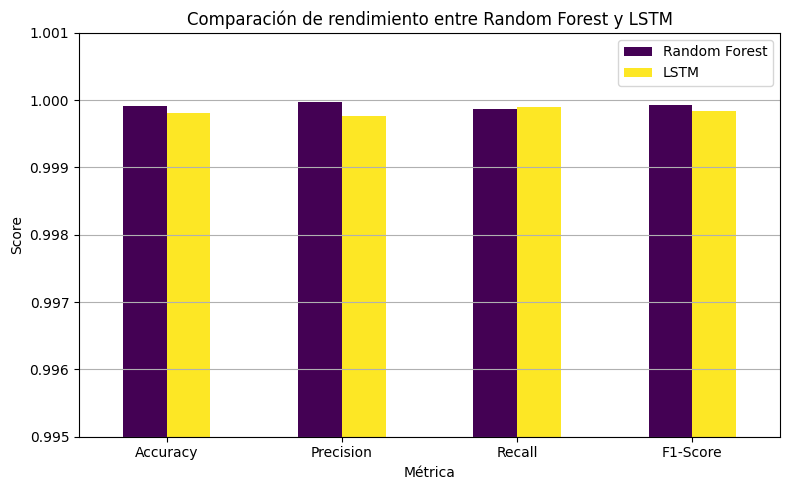

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score

rf_accuracy = accuracy_score(y_test, y_pred)
rf_precision = precision_score(y_test, y_pred)
rf_recall = recall_score(y_test, y_pred)
rf_f1 = f1_score(y_test, y_pred)

lstm_accuracy = accuracy_score(y_test, lstm_preds_class)
lstm_precision = precision_score(y_test, lstm_preds_class)
lstm_recall = recall_score(y_test, lstm_preds_class)
lstm_f1 = f1_score(y_test, lstm_preds_class)

comparison_df = pd.DataFrame({
    'Métrica': ['Accuracy', 'Precision', 'Recall', 'F1-Score'],
    'Random Forest': [rf_accuracy, rf_precision, rf_recall, rf_f1],
    'LSTM': [lstm_accuracy, lstm_precision, lstm_recall, lstm_f1]
})

print("\n Comparación de métricas entre Random Forest y LSTM:")
display(comparison_df)

import matplotlib.pyplot as plt

comparison_df.set_index('Métrica').plot(kind='bar', figsize=(8, 5), ylim=(0.995, 1.001), colormap='viridis')
plt.title('Comparación de rendimiento entre Random Forest y LSTM')
plt.ylabel('Score')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.tight_layout()
plt.show()
